# **Maestria en Ingenieria Economica - Universidad Nacional de Ingenieria**

---

### Curso: _Macroeconomia_

### Profesor (_TA_): _Rodney Menezes_ 

### Tema: _Modelo Consumo de Torta Estocastico - Bellman_

### Fecha: _22/12/2023_

---


Para resolver el modelo de Consumo de Torta Estocástico mediante el método de Value Function Iteration (VFI), primero vamos a establecer la ecuación de Bellman. El modelo es un caso clásico de un problema de optimización dinámica bajo incertidumbre.

La ecuación de Bellman para este problema se puede escribir como:



$$V(k_t, \theta_t) = \max_{C_t} \left\{ \ln(C_t) + \beta E_t[V(k_{t+1})] \right\}$$

Sujeto a:

$$\theta_t k_t = C_t + k_{t+1}$$

$$\ln(\theta_t) \sim N(0, \sigma^2)$$


Donde $V(k_t, \theta_t)$ es la función de valor, $\beta$ es el factor de descuento, $C_t$ es el consumo en el tiempo $t$, $k_{t+1}$  es el capital en el tiempo $t+1$, y $\theta_t$ es el término estocástico que afecta al stock de torta.

Para implementar el VFI, seguiremos estos pasos:

- Inicializar una función de valor arbitraria, por ejemplo, $V_0(k_t, \theta_t) = 0$ para todos los $k$ y $\theta$
- Resolver el problema de maximización en la ecuación de Bellman para encontrar la función de política óptima.
- Actualizar la función de valor con el resultado del paso 2.
- Repetir los pasos 2 y 3 hasta que la función de valor converja.

In [19]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.interpolate import interp1d

# Parámetros del modelo
beta = 0.96          # Factor de descuento
sigma = 0.1          # Desviación estándar de log(theta_t)
num_k = 4          # Número de puntos en la grilla de capital
k_min = 0.1         # Capital mínimo
k_max = 1            # Capital máximo
k_grid = np.linspace(k_min, k_max, num_k)

# Simulación de shocks
num_shocks = 5
theta_shocks = np.exp(np.random.normal(0, sigma, num_shocks))

# Función de utilidad
def utility(c):
    return np.log(c)

# Función de valor inicial
V_initial = np.zeros((num_k, num_shocks))

# Política inicial
policy_function = np.zeros_like(V_initial)

# Precisión para la convergencia
tolerance = 1e-4
difference = 1

# Value Function Iteration
while difference > tolerance:
    V_new = np.zeros_like(V_initial)
    policy_new = np.zeros_like(policy_function)
    for i, k in enumerate(k_grid):
        for j, theta in enumerate(theta_shocks):
            def objective(K_next):
                C = theta * k - K_next
                if C <= 0:
                    return -np.inf
                interp_func = interp1d(k_grid, V_initial[:, j], kind='linear', fill_value="extrapolate")
                V_next = np.mean([interp_func(k_next) for k_next in theta_shocks * K_next])
                return -(utility(C) + beta * V_next)

            result = minimize_scalar(objective, bounds=(0, theta * k), method='bounded')
            V_new[i, j] = -result.fun
            policy_new[i, j] = theta * k - result.x

    difference = np.max(np.abs(V_new - V_initial))
    V_initial = np.copy(V_new)
    policy_function = np.copy(policy_new)

# Resultados
print("Función de Valor Final:\n", V_initial)
print("Función de Política Óptima:\n", policy_function)


Función de Valor Final:
 [[-73.37992013 -72.88692855 -74.17946553 -72.74673205 -72.68088235]
 [-71.35465419 -70.98834114 -72.00266933 -71.06488944 -70.96700972]
 [-69.4774649  -69.26839403 -69.93817565 -69.61378717 -69.47618374]
 [-67.7283863  -67.69341781 -67.97801469 -68.34015277 -68.15602661]]
Función de Política Óptima:
 [[0.10154655 0.09945422 0.10323691 0.09331252 0.0945224 ]
 [0.15677714 0.16723709 0.14586279 0.18879023 0.18526224]
 [0.1691449  0.18460822 0.15379806 0.21881049 0.21297921]
 [0.18153335 0.20160113 0.16198531 0.23054382 0.22920239]]


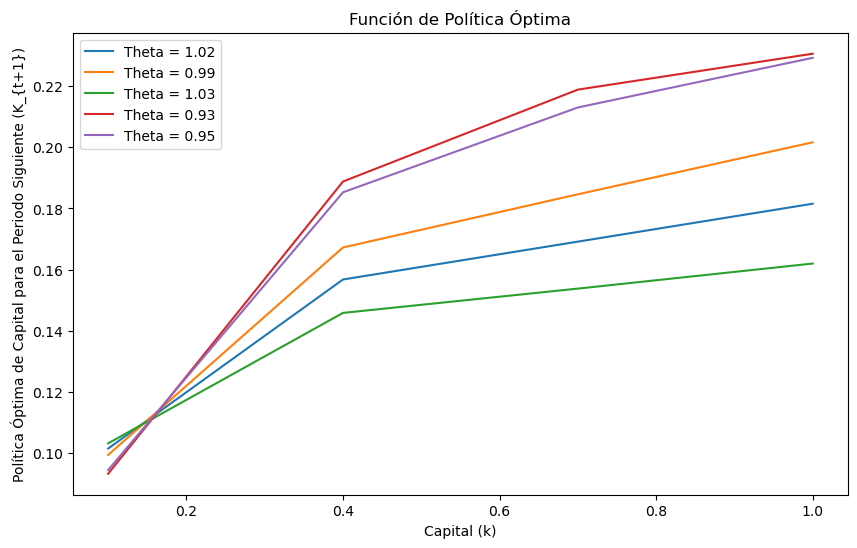

In [20]:
import matplotlib.pyplot as plt

# Configuración de la gráfica
plt.figure(figsize=(10, 6))
for j in range(num_shocks):
    plt.plot(k_grid, policy_function[:, j], label=f'Theta = {theta_shocks[j]:.2f}')

plt.title('Función de Política Óptima')
plt.xlabel('Capital (k)')
plt.ylabel('Política Óptima de Capital para el Periodo Siguiente (K_{t+1})')
plt.legend()
plt.show()
